<a href="https://colab.research.google.com/github/hdavidoff/datathon23/blob/hannah/Summary_exploration_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
artworks = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artwork.parquet.gzip')
artists = pd.read_parquet('https://kuleuven-datathon-2023.s3.eu-central-1.amazonaws.com/data/Artist.parquet.gzip')

import io
import matplotlib.pyplot as plt
import requests
from PIL import Image

def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def get_AI_gen(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    return image

In [2]:
artworks.head(5)


,id,name,url,image_url,artist,rating,summary,year,medium,location
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum
1,1,Starry Night,http://wikigallery.org/wiki/painting_9698/Vinc...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,None,NaN,NaN,None
2,2,A Digger,http://wikigallery.org/wiki/painting_132953/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,7.0,None,NaN,NaN,None
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,None
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,None


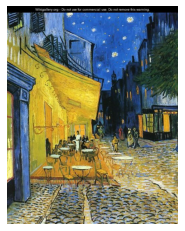

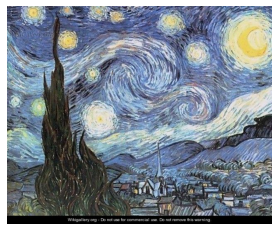

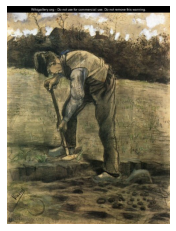

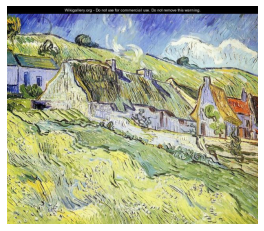

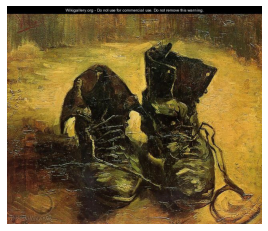

In [3]:
for val in range(0,5):
  display_artwork(artworks.image_url.values[val])

# summary exploration

In [4]:
for val in range(30,100):
  print("title: ",artworks.name.values[val])
  print("summary: ",artworks.summary.values[val])
  #display_artwork(artworks.image_url.values[val])

title:  A Bowlful Of Roses
summary:  None
title:  Roses And Jasmine In A Delft Vase
summary:  None
title:  A Road In Louveciennes
summary:  Louveciennes (French pronunciation: [luv(ə)sjɛn] (listen)) is a commune in the Yvelines department in the Île-de-France region in north-central France. It is located in the western suburbs of Paris, between Versailles and Saint-Germain-en-Laye, and adjacent to Marly-le-Roi.
title:  Le Pont Neuf Paris
summary:  The Pont Neuf (French pronunciation: ​[pɔ̃ nœf], "New Bridge") is the oldest standing bridge across the river Seine in Paris, France. It stands by the western (downstream) point of the Île de la Cité, the island in the middle of the river that was, between 250 and 225 BC, the birthplace of Paris, then known as Lutetia and, during the medieval period, the heart of the city.
The bridge is composed of two separate spans, one of five arches joining the left bank to the Île de la Cité, another of seven joining the island to the right bank. Old eng

In [5]:
## count the number of None summaries in the data
artworks.count() ## 10517 --> 6761

id           10517
name         10517
url          10517
image_url    10517
artist       10517
rating        4546
summary       6761
year           261
medium         526
location       704
dtype: int64

Starting keyword extraction

# NEW SOURCE PRICES

In [6]:
!pip install git+https://github.com/LIAAD/yake
import yake
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')   # Required for tokenization
nltk.download('wordnet') # Required for lemmatization
nltk.download('omw-1.4')
nltk.download('stopwords')
# Instantiate
lemmatizer = WordNetLemmatizer()


import numpy as np
from scipy import stats

from wordcloud import WordCloud
from collections import Counter
## code source: https://medium.com/@y.s.yoon/nlp-illustration-in-python-extracting-keywords-e9c4a6e0a267

## count number of matching words between name and price name

def count_match_words(text1,text2):
  tokens1 = word_tokenize(text1)
  tokens2 = word_tokenize(text2)
  count_match = [1  for token in tokens1 if token in tokens2]
  sum_match = sum(count_match)
  if len(tokens1) != 0:
    perc_match = (sum_match/len(tokens1))*100
  else:
    perc_match = np.nan

  return perc_match

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-otb4htvv
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-otb4htvv
  Resolved https://github.com/LIAAD/yake to commit 8d71d94ded93fb77f1361f62e5264f19b9c91cd7
  Preparing metadata (setup.py) ... done


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Load in prices and get rid of all that have null prices or null summaries

In [7]:
art_with_prices = pd.read_csv('/content/artworks_with_prices_v3.csv')
art_with_ps = art_with_prices.loc[(art_with_prices['price_name'].notnull())&(art_with_prices['summary'].notnull())]
art_with_ps.count()

id              6606
name            6606
url             6606
image_url       6606
artist          6606
rating          2927
summary         6606
year             258
medium           521
location         622
name_english    6606
artist_name     6606
price           6606
price_name      6606
dtype: int64

6606 artworks remaining

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append('du')
stop_words.append('au')
stop_words.append('de')
stop_words.append('à')
stop_words.append('la')

# Exclusion list of punctuations and numbers
exclist = string.punctuation + string.digits + '-'+'’'+'”'+'–'
# Print the exclusion list
print(exclist)


def clean_text(text):
  text = text.lower()

  text = text.translate(str.maketrans(" "," ",exclist))

 
  # Tokenization
  tokens = word_tokenize(text)

  # Lemmatization
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
  # Remove stop words
  tokens = [token for token in tokens if token not in stop_words]

  #special replace
  st_replace = ['saint']
  tokens = [token if token not in st_replace else 'st' for token in tokens ]
    
  # Join tokens
  clean_text = " ".join(tokens)
    
  # Return the output
  return clean_text

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789-’”–


Clean the text from the name and price_name columns for matching.

In [11]:
for_summ = art_with_ps

for_summ.loc[:,'name_english'] = for_summ.apply(lambda row: clean_text(row['name_english']),axis=1).copy()
for_summ.loc[:,'price_name'] = for_summ.apply(lambda row: clean_text(row['price_name']),axis=1).copy()
for_summ.loc[:,'artist_name'] = for_summ.apply(lambda x: clean_text(x.artist_name),axis=1).copy()
for_summ.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,id,name,url,image_url,artist,rating,summary,year,medium,location,name_english,artist_name,price,price_name,ln_split,last_name
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Café Terrace at Night is an 1888 oil painting ...,1888.0,0.0,Kröller-Müller Museum,cafe terrace place forum,vincent van gogh,5523624.75,average price artist,"[vincent, van, gogh]",gogh
3,3,A Group of Cottages,http://wikigallery.org/wiki/painting_132642/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,6.0,Stoneywell is a National Trust property in Ulv...,NaN,NaN,NaN,group cottage,vincent van gogh,18500.00,van thatched cottage cordeville,"[vincent, van, gogh]",gogh
4,4,A Pair of Shoes,http://wikigallery.org/wiki/painting_94630/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,Toms (stylized as TOMS) is a for-profit compan...,NaN,NaN,NaN,pair shoe,vincent van gogh,10000000.00,pair shoe,"[vincent, van, gogh]",gogh
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,blossoming almond tree,vincent van gogh,3000.00,almond blossom,"[vincent, van, gogh]",gogh
6,6,Branches with Almond Blossom,http://wikigallery.org/wiki/painting_133105/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,Almond Blossoms is a group of several painting...,1890.0,0.0,Van Gogh Museum,branch almond blossom,vincent van gogh,3000.00,almond blossom,"[vincent, van, gogh]",gogh


In [12]:
for_summ['ln_split'] = for_summ['artist_name'].str.split(' ')
for_summ['last_name'] = for_summ.ln_split.apply(lambda x:x[-1])

<ipython-input-12-8c4758c20eef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_summ['ln_split'] = for_summ['artist_name'].str.split(' ')
<ipython-input-12-8c4758c20eef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_summ['last_name'] = for_summ.ln_split.apply(lambda x:x[-1])


In [13]:
## initial cleaning of summary (still keep artist data in summary)
for_summ['summary'] = for_summ.apply(lambda row: clean_text(row['summary']),axis=1)

for_summ = for_summ[~for_summ['summary'].isnull()]
for_summ['ln_in_sum'] = for_summ.apply(lambda x: x.last_name in x.summary, axis =1)
for_summ = for_summ.loc[for_summ['ln_in_sum']==True].copy() ## take rows where last name of artist is present in summary
for_summ = for_summ.drop_duplicates(subset='summary') # keeps first ## don't analyze the art from this limited set as it could throw out paintings we could otherwise keep
for_summ.count()

<ipython-input-13-a621460fbd93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_summ['summary'] = for_summ.apply(lambda row: clean_text(row['summary']),axis=1)


id              504
name            504
url             504
image_url       504
artist          504
rating          279
summary         504
year            123
medium          208
location        222
name_english    504
artist_name     504
price           504
price_name      504
ln_split        504
last_name       504
ln_in_sum       504
dtype: int64

504 artworks remaining that have the artists' (hopefully) last name in the summary

In [14]:
for_summ['match_perc'] = for_summ.apply(lambda row: count_match_words(row['name_english'],row['price_name']),axis=1)
for_summ.head()

,id,name,url,image_url,artist,rating,summary,year,medium,location,name_english,artist_name,price,price_name,ln_split,last_name,ln_in_sum,match_perc
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,café terrace night oil painting dutch artist v...,1888.0,0.0,Kröller-Müller Museum,cafe terrace place forum,vincent van gogh,5523624.75,average price artist,"[vincent, van, gogh]",gogh,True,0.000000
5,5,Blossoming Almond Tree,http://wikigallery.org/wiki/painting_14446/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,10.0,almond blossom group several painting made vin...,1890.0,0.0,Van Gogh Museum,blossoming almond tree,vincent van gogh,3000.00,almond blossom,"[vincent, van, gogh]",gogh,True,33.333333
8,8,Agostina Segatori Sitting In The Cafe Du Tambo...,http://wikigallery.org/wiki/painting_14352/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,9.0,agostina segatori sitting café tambourin wa pa...,1887.0,0.0,Van Gogh Museum,agostina segatori sitting cafe tambourin,vincent van gogh,669500.00,peasant woman halffigure sitting,"[vincent, van, gogh]",gogh,True,20.000000
10,10,Peach Trees in Blossom,http://wikigallery.org/wiki/painting_133052/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,peach tree blossom painting vincent van gogh c...,NaN,NaN,NaN,peach tree blossom,vincent van gogh,250000.00,vincent van gogh landscape windswept tree,"[vincent, van, gogh]",gogh,True,33.333333
15,15,Bank Of The Oise At Auvers,http://wikigallery.org/wiki/painting_14336/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,auverssuroise french pronunciation ovɛʁ syʁ wa...,NaN,NaN,NaN,bank oise auvers,vincent van gogh,5000000.00,le chaumieres auvers,"[vincent, van, gogh]",gogh,True,33.333333


In [16]:
artist_words = for_summ['artist_name'].str.cat(sep=" ")
artist_words = clean_text(artist_words)

def clean_text_summ(text):
  text = text.lower()

  text = text.translate(str.maketrans(" "," ",exclist))

 
  # Tokenization
  tokens = word_tokenize(text)

  # Lemmatization
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
  # Remove stop words
  tokens = [token for token in tokens if token not in stop_words]

  # Remove artist name words
  tokens = [token for token in tokens if token not in artist_words]

  #special replace
  st_replace = ['saint']
  tokens = [token if token not in st_replace else 'st' for token in tokens ]
    
  # Join tokens
  clean_text = " ".join(tokens)
    
  # Return the output
  return clean_text

# apply cleaning to summary again to remove artist name words, because otherwise these will flood the keyword analysis
for_summ['summary'] = for_summ.apply(lambda row: clean_text_summ(row['summary']),axis=1)


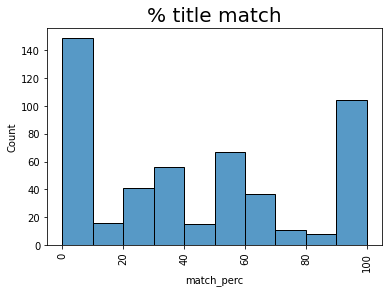

In [17]:
import seaborn as sns
sns.histplot(x=for_summ['match_perc'])
plt.xticks(rotation='vertical')
plt.title("% title match", fontsize = 20)
plt.show()

In [18]:
for_summ['avg_price_bool'] = for_summ.apply(lambda row: 1 if row['price_name']=='average price artist' else 0,axis=1)


In [19]:
#set threshold for percentage max minimum
min_match = 40
for_summ_40 = for_summ.loc[(for_summ['match_perc']>=min_match)|for_summ['avg_price_bool']==1]
for_summ_40.count()

id                373
name              373
url               373
image_url         373
artist            373
rating            211
summary           373
year               95
medium            162
location          168
name_english      373
artist_name       373
price             373
price_name        373
ln_split          373
last_name         373
ln_in_sum         373
match_perc        373
avg_price_bool    373
dtype: int64

373 artworks remaining

In [20]:
for_summ_40 = for_summ_40.drop_duplicates(subset='summary') # keeps first ## don't analyze the art from this limited set as it could throw out paintings we could otherwise keep
for_summ_40.count()

id                373
name              373
url               373
image_url         373
artist            373
rating            211
summary           373
year               95
medium            162
location          168
name_english      373
artist_name       373
price             373
price_name        373
ln_split          373
last_name         373
ln_in_sum         373
match_perc        373
avg_price_bool    373
dtype: int64

In [21]:
## none with duplicate summaries (which is good because before there were summaries from collections that were verbatim the same)

In [22]:
art_with_ps.loc[:,'name_english'] = art_with_ps.apply(lambda row: clean_text(row['name_english']),axis=1).copy()
art_with_ps.loc[:,'price_name'] = art_with_ps.apply(lambda row: clean_text(row['price_name']),axis=1).copy()
art_with_ps.loc[:,'match_perc'] = art_with_ps.apply(lambda row: count_match_words(row['name_english'],row['price_name']),axis=1).copy()
art_with_ps.loc[:,'avg_price_bool'] = art_with_ps.apply(lambda row: 1 if row['price_name']=='average price artist' else 0,axis=1)

art_with_ps_good = art_with_ps.loc[(art_with_ps['match_perc']>=40)|(art_with_ps['avg_price_bool']==1)]
art_with_ps_good.count()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


id                5475
name              5475
url               5475
image_url         5475
artist            5475
rating            2475
summary           5475
year               214
medium             436
location           514
name_english      5475
artist_name       5475
price             5475
price_name        5475
ln_split          5475
last_name         5475
match_perc        5473
avg_price_bool    5475
dtype: int64

In [23]:
## take into all prices we could find after doing the matching check
prices_arr_tot = np.array(art_with_ps_good['price'])
prices_arr = np.array(for_summ_40['price'])

for_summ_40['price_percentile'] = for_summ_40.apply(lambda x: stats.percentileofscore(prices_arr, x.price), axis =1) # small reference
for_summ_40['price_percentile_tot'] = for_summ_40.apply(lambda x: stats.percentileofscore(prices_arr_tot, x.price), axis =1) # whole price reference


for_summ_40_exp = for_summ_40.loc[for_summ_40['price_percentile_tot']>= 90]
for_summ_40.head(2)

,id,name,url,image_url,artist,rating,summary,year,medium,location,...,artist_name,price,price_name,ln_split,last_name,ln_in_sum,match_perc,avg_price_bool,price_percentile,price_percentile_tot
0,0,Cafe Terrace on the Place du Forum,http://wikigallery.org/wiki/painting_133032/Vi...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,8.0,café terrace night painting dutch artist also ...,1888.0,0.0,Kröller-Müller Museum,...,vincent van gogh,5523624.75,average price artist,"[vincent, van, gogh]",gogh,True,0.0,1,91.554960,96.940639
16,16,Crab On Its Back,http://wikigallery.org/wiki/painting_14523/Vin...,https://kuleuven-datathon-2023.s3.eu-central-1...,0,NaN,crab back dutch zijn rug liggende krab paintin...,NaN,0.0,Van Gogh Museum,...,vincent van gogh,692248.00,house seen back window siens mother house,"[vincent, van, gogh]",gogh,True,50.0,0,74.798928,86.027397


In [26]:
for_summ_40.count()

id                      373
name                    373
url                     373
image_url               373
artist                  373
rating                  211
summary                 373
year                     95
medium                  162
location                168
name_english            373
artist_name             373
price                   373
price_name              373
ln_split                373
last_name               373
ln_in_sum               373
match_perc              373
avg_price_bool          373
price_percentile        373
price_percentile_tot    373
dtype: int64

373 artworks, 78 in the top 10% of the overall price dataset (5475 artworks with trustable prices)

In [27]:
for_summ_40_exp.count()

id                      78
name                    78
url                     78
image_url               78
artist                  78
rating                  53
summary                 78
year                    31
medium                  37
location                39
name_english            78
artist_name             78
price                   78
price_name              78
ln_split                78
last_name               78
ln_in_sum               78
match_perc              78
avg_price_bool          78
price_percentile        78
price_percentile_tot    78
dtype: int64

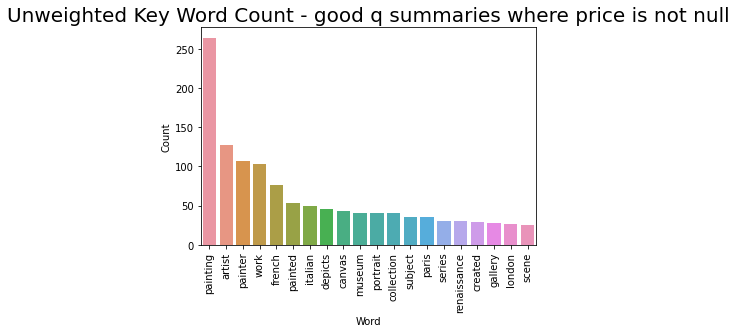

In [28]:
# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=1)
# Extract keywords and scores from each artwork summary
keywords = for_summ_40['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
text_weighted = []
word_orig_price = []
for i in range(0,len(keywords)-1):
    list = keywords.values[i]
    for component in list:
        text.append(str(component[0]))
        text_weighted.append(component[1])
        word_orig_price.append(for_summ_40['price_percentile_tot'].values[i])
        

## save results in dataframe
df = pd.DataFrame(zip(text,text_weighted,word_orig_price),columns=['text','weight','price_percentile_reltotot'])
df['count']=df.groupby('text')['text'].transform('count')
new_df = df.groupby('text').agg('mean')
new_df['w_price'] = (1-new_df['weight'])*(new_df['price_percentile_reltotot']/100)*new_df['count']
new_df['w_price_only_count'] = (new_df['price_percentile_reltotot']/100)*new_df['count']
new_df['w_price_rel'] = (1-new_df['weight'])*(new_df['price_percentile_reltotot']/100)*(new_df['count']/len(for_summ_40))


# Plot a bar chart of the most common 20 words

common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Unweighted Key Word Count - good q summaries where price is not null", fontsize = 20)
plt.show()


# Bar plot - Create a dataframe of the most common 20 words
common_words_all_100 = pd.DataFrame(Counter(text).most_common(100))
common_words_all_100.columns = ('Word', 'Count')
common_words_all_100['rel_count'] = common_words_all_100['Count']/len(for_summ_40)

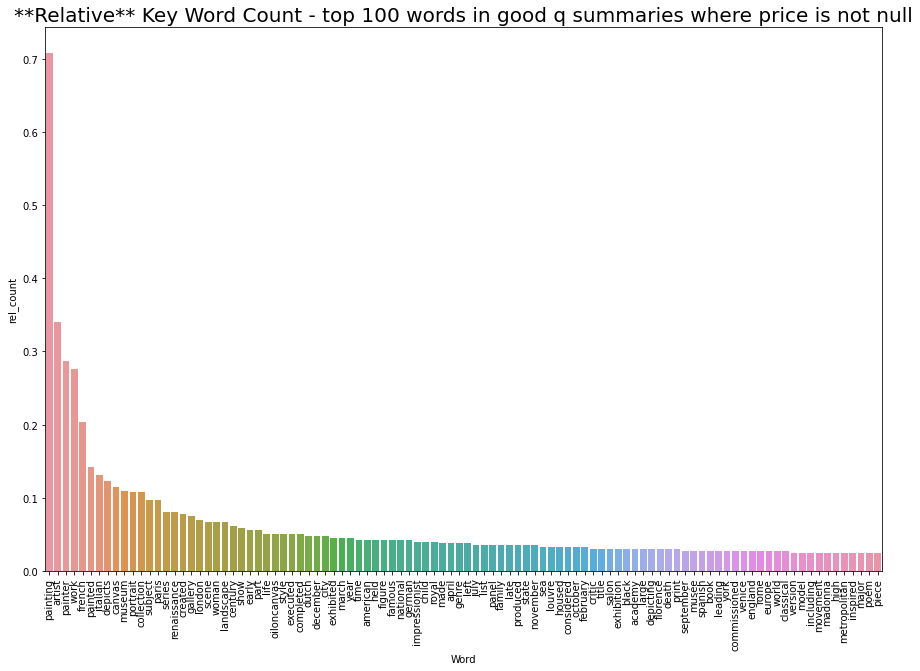

In [30]:
from matplotlib.pyplot import figure
# Plot a bar chart of the most common 20 words
fig = figure(figsize=(15,10))
sns.barplot(x= common_words_all_100['Word'], y=common_words_all_100['rel_count'])
plt.xticks(rotation='vertical')
plt.title("**Relative** Key Word Count - top 100 words in good q summaries where price is not null", fontsize = 20)
plt.show()



In [31]:
common_words_all40 = pd.DataFrame(Counter(text).most_common(750))
common_words_all40.columns = ('Word', 'Count')
common_words_all40['rel_count'] = common_words_all40['Count']/len(for_summ_40)

In [32]:
common_words_all40

,Word,Count,rel_count
0,painting,264,0.707775
1,artist,127,0.340483
2,painter,107,0.286863
3,work,103,0.276139
4,french,76,0.203753
...,...,...,...
745,generally,2,0.005362
746,culture,2,0.005362
747,element,2,0.005362
748,include,2,0.005362


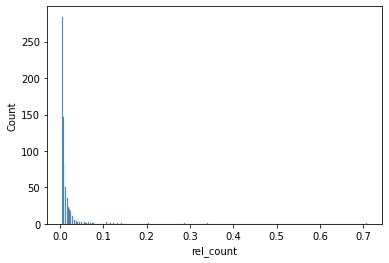

In [33]:
sns.histplot(common_words_all40['rel_count'])

In [34]:
## number of paintings in expensive dataframe 
for_summ_40_exp.count()

id                      78
name                    78
url                     78
image_url               78
artist                  78
rating                  53
summary                 78
year                    31
medium                  37
location                39
name_english            78
artist_name             78
price                   78
price_name              78
ln_split                78
last_name               78
ln_in_sum               78
match_perc              78
avg_price_bool          78
price_percentile        78
price_percentile_tot    78
dtype: int64

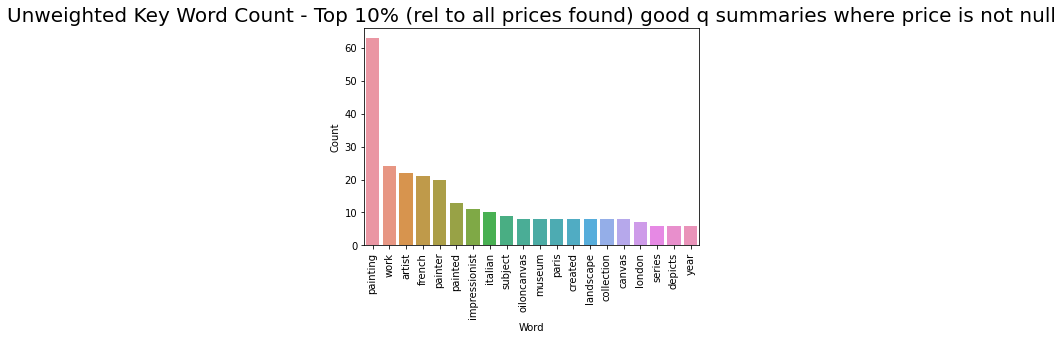

In [35]:
# Instantiate (set n-word groupings hyperparameters to 2)
kw_extractor = yake.KeywordExtractor(n=1)
# Extract keywords and scores from each artwork summary
keywords = for_summ_40_exp['summary'].apply(kw_extractor.extract_keywords)
# Extract scores from the YAKE output
text = []
text_weighted = []
word_orig_price = []
for i in range(0,len(keywords)-1):
    list = keywords.values[i]
    for component in list:
        text.append(str(component[0]))
        text_weighted.append(component[1])
        word_orig_price.append(for_summ_40['price_percentile_tot'].values[i])
        

## save results in dataframe
df = pd.DataFrame(zip(text,text_weighted,word_orig_price),columns=['text','weight','price_percentile_reltotot'])
df['count']=df.groupby('text')['text'].transform('count')
new_df_exp = df.groupby('text').agg('mean')
new_df_exp['w_price'] = (1-new_df_exp['weight'])*(new_df_exp['price_percentile_reltotot']/100)*new_df_exp['count']
new_df_exp['w_price_only_count'] = (new_df_exp['price_percentile_reltotot']/100)*new_df_exp['count']
new_df_exp['w_price_rel'] = (1-new_df_exp['weight'])*(new_df_exp['price_percentile_reltotot']/100)*(new_df_exp['count']/len(for_summ_40_exp))


# Plot a bar chart of the most common 20 words

common_words = pd.DataFrame(Counter(text).most_common(20))
common_words.columns = ('Word', 'Count')
sns.barplot(x= common_words['Word'], y=common_words['Count'])
plt.xticks(rotation='vertical')
plt.title("Unweighted Key Word Count - Top 10% (rel to all prices found) good q summaries where price is not null", fontsize = 20)
plt.show()


# Bar plot - Create a dataframe of the most common 20 words
common_words = pd.DataFrame(Counter(text).most_common(500))
common_words.columns = ('Word', 'Count')
common_words['rel_count'] = common_words['Count']/len(for_summ_40_exp)

In [36]:
common_words_join = common_words_all40.merge(common_words,on='Word',how='left')
common_words_join.head(2)

,Word,Count_x,rel_count_x,Count_y,rel_count_y
0,painting,264,0.707775,63.0,0.807692
1,artist,127,0.340483,22.0,0.282051


In [38]:
new_df = new_df.rename(columns={'weight': 'weight_all', 'price_percentile_reltotot': 'price_percentile_reltotot_all','count': 'count_all','w_price': 'w_price_all','w_price_only_count': 'w_price_only_count_all','w_price_rel': 'w_price_rel_all'})
new_df.head()

,weight_all,price_percentile_reltotot_all,count_all,w_price_all,w_price_only_count_all,w_price_rel_all
text,,,,,,
aanbiedend,0.135680,83.488584,1.0,0.721608,0.834886,0.001935
abbey,0.057240,48.045662,3.0,1.358866,1.441370,0.003643
abducted,0.123114,48.767123,1.0,0.427632,0.487671,0.001146
abraham,0.079733,22.082192,1.0,0.203215,0.220822,0.000545
absence,0.104729,12.867580,1.0,0.115200,0.128676,0.000309


In [39]:
new_df_exp.head()

,weight,price_percentile_reltotot,count,w_price,w_price_only_count,w_price_rel
text,,,,,,
absinthe,0.106333,52.237443,1.0,0.466829,0.522374,0.005985
academy,0.068482,99.534247,1.0,0.927179,0.995342,0.011887
accident,0.182111,72.840183,1.0,0.595752,0.728402,0.007638
acclaim,0.145516,2.840183,1.0,0.024269,0.028402,0.000311
acknowledged,0.126158,84.273973,1.0,0.736421,0.842740,0.009441


In [40]:
df_combo = new_df.join(new_df_exp,how='right')

,weight_all,price_percentile_reltotot_all,count_all,w_price_all,w_price_only_count_all,w_price_rel_all,weight,price_percentile_reltotot,count,w_price,w_price_only_count,w_price_rel
text,,,,,,,,,,,,
absinthe,0.106333,97.260274,1.0,0.869183,0.972603,0.002330,0.106333,52.237443,1.0,0.466829,0.522374,0.005985
academy,0.111256,44.891656,11.0,4.388689,4.938082,0.011766,0.068482,99.534247,1.0,0.927179,0.995342,0.011887
accident,0.182111,94.949772,1.0,0.776584,0.949498,0.002082,0.182111,72.840183,1.0,0.595752,0.728402,0.007638
acclaim,0.159459,80.315068,2.0,1.350162,1.606301,0.003620,0.145516,2.840183,1.0,0.024269,0.028402,0.000311
acknowledged,0.126158,93.415525,1.0,0.816304,0.934155,0.002188,0.126158,84.273973,1.0,0.736421,0.842740,0.009441


In [45]:
df_combo['difference_to_expensive'] = df_combo.apply(lambda row: row['w_price_rel']-row['w_price_rel_all'],axis=1).copy()
df_combo.tail()

,weight_all,price_percentile_reltotot_all,count_all,w_price_all,w_price_only_count_all,w_price_rel_all,weight,price_percentile_reltotot,count,w_price,w_price_only_count,w_price_rel,difference_to_expensive
text,,,,,,,,,,,,,
painted,0.135449,56.255708,53.0,25.777041,29.815525,0.069107,0.146548,80.177731,13.0,8.895620,10.423105,0.114046,0.044939
oiloncanvas,0.174442,67.100697,19.0,10.525148,12.749132,0.028218,0.165199,85.574201,8.0,5.714991,6.845936,0.073269,0.045052
work,0.092679,61.175777,103.0,57.171234,63.011050,0.153274,0.090477,73.253805,24.0,15.990253,17.580913,0.205003,0.051729
impressionist,0.141392,85.878234,15.0,11.060361,12.881735,0.029652,0.148854,74.571191,11.0,6.981811,8.202831,0.089510,0.059858
painting,0.108458,57.825446,264.0,136.102083,152.659178,0.364885,0.107809,65.633688,63.0,36.891417,41.349224,0.472967,0.108082


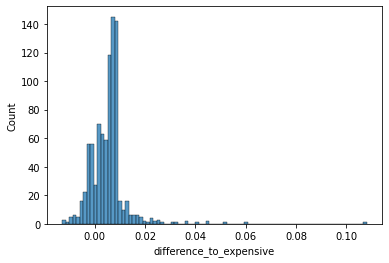

In [42]:
sns.histplot(df_combo['difference_to_expensive'])

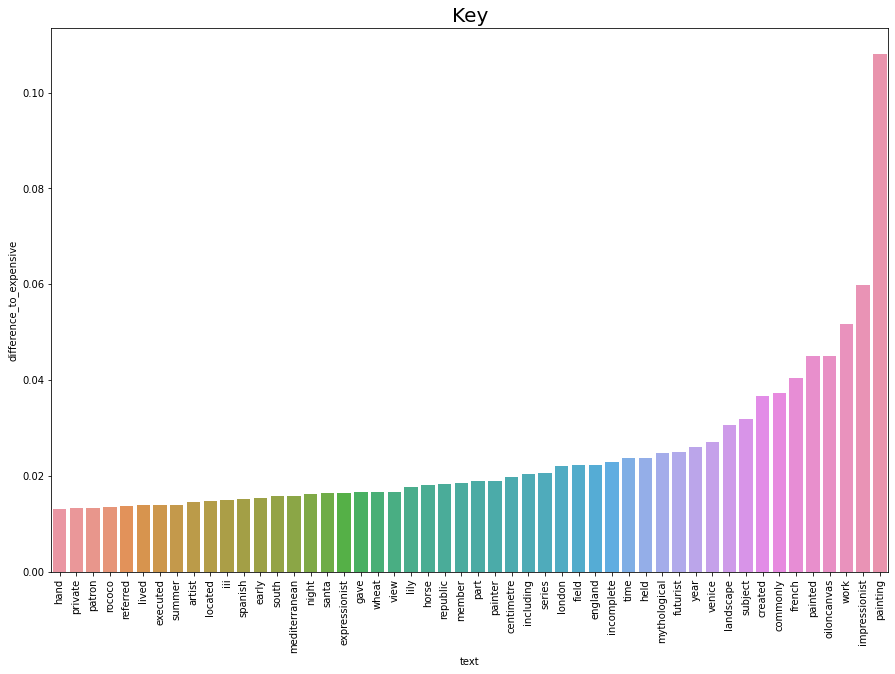

In [43]:
df_combo.sort_values('difference_to_expensive',inplace=True)
fig = figure(figsize=(15,10))
top_most_impact = df_combo.tail(50)
sns.barplot(x= top_most_impact.index, y=top_most_impact['difference_to_expensive'])
plt.xticks(rotation='vertical')
plt.title("Key", fontsize = 20)
plt.show()

In [47]:
#words in new_df (all good qual summaries)
new_df.count()

weight_all                       2935
price_percentile_reltotot_all    2935
count_all                        2935
w_price_all                      2935
w_price_only_count_all           2935
w_price_rel_all                  2935
dtype: int64

In [48]:
#words in only expensive paintings
new_df_exp.count()

weight                       882
price_percentile_reltotot    882
count                        882
w_price                      882
w_price_only_count           882
w_price_rel                  882
dtype: int64

In [49]:
df_combo.count()

weight_all                       882
price_percentile_reltotot_all    882
count_all                        882
w_price_all                      882
w_price_only_count_all           882
w_price_rel_all                  882
weight                           882
price_percentile_reltotot        882
count                            882
w_price                          882
w_price_only_count               882
w_price_rel                      882
difference_to_expensive          882
dtype: int64

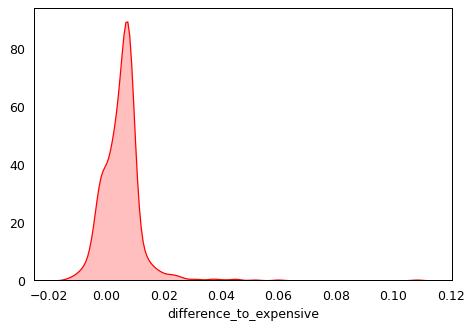

In [52]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig,ax = plt.subplots(1,1,dpi=90)
sns.kdeplot(df_combo.difference_to_expensive,color='r',fill=True)
#sns.kdeplot(new_df_exp.w_price_rel,color='b',fill=True)
ax.set_ylabel("")
ax.tick_params(left=False,bottom=False)

rightward shift indicating slightly higher engineered price feature (what we want)

In [53]:
df_combo['w_price'].nlargest(10)

text
painting         36.891417
work             15.990253
artist           13.615489
painter          12.398049
french           12.383639
painted           8.895620
impressionist     6.981811
subject           6.328463
created           6.100679
oiloncanvas       5.714991
Name: w_price, dtype: float64

In [54]:
df_combo['w_price_only_count'].nlargest(10)

text
painting         41.349224
work             17.580913
artist           16.145936
french           14.511963
painter          14.405297
painted          10.423105
impressionist     8.202831
created           7.214338
subject           7.142466
oiloncanvas       6.845936
Name: w_price_only_count, dtype: float64

In [55]:
df_combo['w_price_rel'].nlargest(10)

text
painting         0.472967
work             0.205003
artist           0.174558
painter          0.158949
french           0.158765
painted          0.114046
impressionist    0.089510
subject          0.081134
created          0.078214
oiloncanvas      0.073269
Name: w_price_rel, dtype: float64

^ see agreement in the words at the top of each of the expensive lists no matter the chosen feature

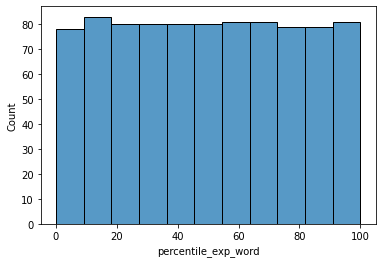

In [61]:
ref_array = df_combo['difference_to_expensive'].values
df_combo['percentile_exp_word'] = df_combo.apply(lambda x: stats.percentileofscore(ref_array,x['difference_to_expensive']),axis=1)
sns.histplot(df_combo['percentile_exp_word'])

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


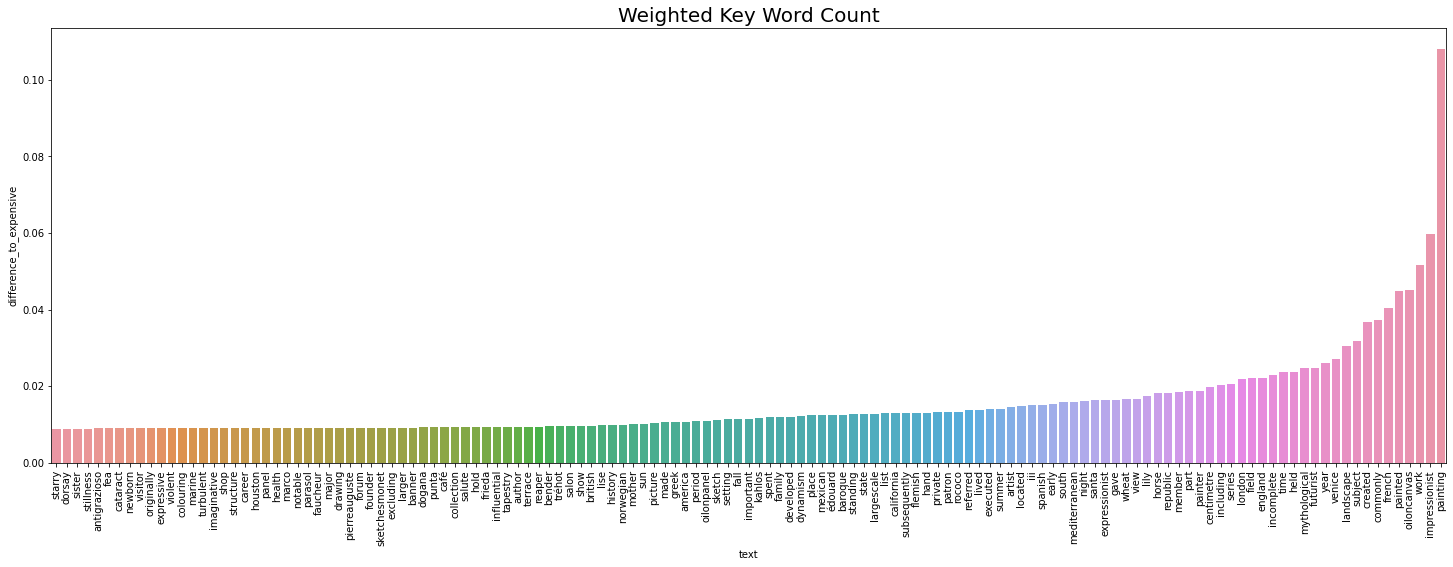

In [69]:
top_words = df_combo.loc[df_combo['percentile_exp_word']>=85]
top_words.sort_values('difference_to_expensive',inplace=True)
plt.figure(figsize=(25,8))
sns.barplot(x= top_words.index, y=top_words['difference_to_expensive'])
plt.xticks(rotation='vertical')
plt.title("Weighted Key Word Count", fontsize = 20)

plt.show()

In [70]:
top_words.count() #133 words in the top 15% of most impactful words

weight_all                       133
price_percentile_reltotot_all    133
count_all                        133
w_price_all                      133
w_price_only_count_all           133
w_price_rel_all                  133
weight                           133
price_percentile_reltotot        133
count                            133
w_price                          133
w_price_only_count               133
w_price_rel                      133
difference_to_expensive          133
percentile_exp_word              133
dtype: int64

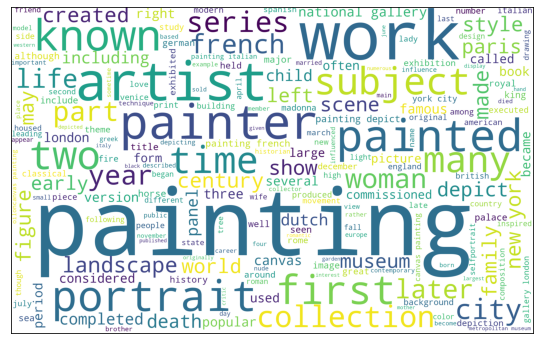

In [64]:
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
art_sum = wc.generate(for_summ_40['summary'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(art_sum);

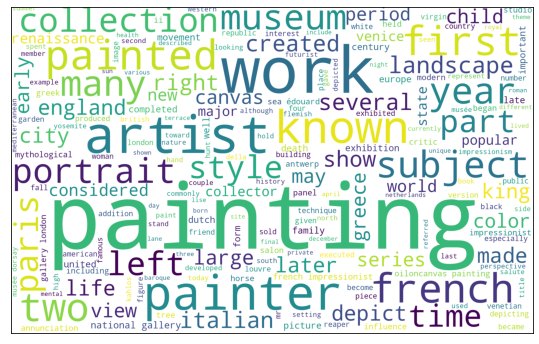

In [66]:
# Instantiate Word Cloud
wc = WordCloud(width=2400,
               height=1500,
               min_font_size=10,
               background_color='white')
# Generate a word cloud
plt.figure(figsize = (24, 6))
art_sum = wc.generate(for_summ_40_exp['summary'].str.cat(sep=" "))
plt.xticks([])
plt.yticks([])
plt.imshow(art_sum);

# Filter adjectives/nouns/art styles based on tokens present in chosen text 

In [72]:
list_top_words = top_words.index.tolist()
list_top_words

['starry',
 'dorsay',
 'sister',
 'stillness',
 'antigrazioso',
 'fea',
 'cataract',
 'newborn',
 'visitor',
 'originally',
 'expressive',
 'violent',
 'colouring',
 'marine',
 'turbulent',
 'imaginative',
 'shop',
 'structure',
 'career',
 'houston',
 'panel',
 'health',
 'marco',
 'notable',
 'parasol',
 'faucheur',
 'major',
 'drawing',
 'pierreauguste',
 'forum',
 'founder',
 'sketchesmonet',
 'excluding',
 'larger',
 'banner',
 'dogana',
 'punta',
 'café',
 'collection',
 'salute',
 'hold',
 'frieda',
 'influential',
 'tapestry',
 'author',
 'terrace',
 'reaper',
 'bender',
 'tréhot',
 'salon',
 'show',
 'british',
 'lise',
 'history',
 'norwegian',
 'mother',
 'sun',
 'picture',
 'made',
 'greek',
 'america',
 'period',
 'oilonpanel',
 'sketch',
 'setting',
 'fall',
 'important',
 'kahlos',
 'spent',
 'family',
 'developed',
 'dynamism',
 'place',
 'mexican',
 'édouard',
 'baroque',
 'standing',
 'state',
 'largescale',
 'list',
 'california',
 'subsequently',
 'flemish',
 'hand'

In [86]:
def adj_to_style(s):
  w = 'ism'
  if s.endswith(w):
    # if s ends with w, take only the part before w and add the replacement
    s = s[:-len(w)] + 'ist'
  else:
    s
  return s

In [76]:
adject = pd.read_csv('/content/adjectives.txt', sep=" ", header=None)
adjectives_filt = [adj for adj in adject if adj in list_top_words]
adjectives_filt

[]

In [88]:
with open('/content/artstyles.txt') as f:
  art_styles = f.readlines()
  art_styles = [x.strip() for x in art_styles]

art_styles_adjust = [adj_to_style(ar_s) for ar_s in art_styles]
art_styles_adjust
art_styles_txt = ' '.join(art_styles_adjust)
art_styles_txt

'Abstract Expressionist Art Deco Art Nouveau Avant-garde Baroque Bauhaus Classicist CoBrA Color Field Painting Conceptual Art Constructivist Cubist Dadaist Digital Art Expressionist Fauvist Futurist Harlem Renaissance Impressionist Installation Art Land Art Minimalist Neo-Impressionist Neoclassicist Neon Art Op Art Performance Art Pop Art Post-Impressionist Precisionist Rococo Street Art Surrealist Suprematist Symbolist Zero Group'

In [89]:
art_styles = clean_text(art_styles_txt)
art_styles_filt = [ar_s for ar_s in art_styles.split(" ") if ar_s in list_top_words]
art_styles_filt

'abstract expressionist art deco art nouveau avantgarde baroque bauhaus classicist cobra color field painting conceptual art constructivist cubist dadaist digital art expressionist fauvist futurist harlem renaissance impressionist installation art land art minimalist neoimpressionist neoclassicist neon art op art performance art pop art postimpressionist precisionist rococo street art surrealist suprematist symbolist zero group'

In [93]:
noun = pd.read_csv('/content/nouns.txt', sep=" ", header=None)
noun_filt = [n for n in noun if n in list_top_words]
noun_filt

[]

In [109]:
top_percentage = 50
thresh = 100-top_percentage
top_words = df_combo.loc[df_combo['percentile_exp_word']>=thresh]


In [110]:
list_top_words = top_words.index.tolist()
list_top_words

['hat',
 'monkey',
 'netherlandish',
 'european',
 'grand',
 'mistress',
 'represents',
 'earth',
 'aesop',
 'regularly',
 'luncheon',
 'surrounded',
 'latelier',
 'collaboration',
 'filipacchi',
 'improvised',
 'change',
 'style',
 'deʒœne',
 'ʒøn',
 'lherbe',
 'lɛʁb',
 'grass',
 'specialised',
 'town',
 'yvelines',
 'seineetmarne',
 'visit',
 'moretsurloing',
 'met',
 'gentleman',
 'sovereignty',
 'feature',
 'fellow',
 'prolific',
 'domain',
 'surveying',
 'cossiers',
 'coastline',
 'fable',
 'distance',
 'country',
 'bazilles',
 'sailor',
 'eros',
 'couple',
 'cerebral',
 'marked',
 'taste',
 'preeminent',
 'ʒaklwi',
 'beach',
 'snow',
 'close',
 'déjeuner',
 'louvre',
 'willys',
 'greatest',
 'human',
 'october',
 'measure',
 'napoleon',
 'duchess',
 'germany',
 'kɑjbɔt',
 'ɡystav',
 'photography',
 'surrealist',
 'boulogne',
 'seated',
 'bois',
 'jour',
 'deté',
 'gothic',
 'nazionale',
 'monastery',
 'front',
 'robespierre',
 'intended',
 'seascape',
 'cripple',
 'typically',
 '

In [111]:
adjectives_filt = [adj for adj in adject if adj in list_top_words]
adjectives_filt

[]

In [112]:
art_styles_filt = [ar_s for ar_s in art_styles.split(" ") if ar_s in list_top_words]
art_styles_filt

['expressionist',
 'baroque',
 'field',
 'painting',
 'expressionist',
 'futurist',
 'renaissance',
 'impressionist',
 'rococo',
 'surrealist']

In [113]:
noun_filt = [n for n in noun if n in list_top_words]
noun_filt

[]